In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "http://www.ncei.noaa.gov/thredds/dodsC/uv/6h_agg_rt/Preliminary_Aggregation_of_6h_Ocean_Wind_best.ncd"

In [3]:
t_min = np.datetime64('2015-06-01T00:00:00')
t_max = np.datetime64('2015-06-03T00:00:00')
x_min = -60+360
x_max = -40+360
y_min = 40
y_max = 60

In [4]:
ds = xr.open_dataset(url).sel(
                                time = slice(t_min, t_max),
                                lat = slice(y_min, y_max), 
                                lon = slice(x_min, x_max))

In [5]:
ds.variables['time'].values

array(['2015-06-01T00:00:00.000000000', '2015-06-01T06:00:00.000000000',
       '2015-06-01T12:00:00.000000000', '2015-06-01T18:00:00.000000000',
       '2015-06-02T00:00:00.000000000', '2015-06-02T06:00:00.000000000',
       '2015-06-02T12:00:00.000000000', '2015-06-02T18:00:00.000000000',
       '2015-06-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
ds.variables['lon']

<xarray.IndexVariable 'lon' (lon: 81)>
array([ 300.  ,  300.25,  300.5 ,  300.75,  301.  ,  301.25,  301.5 ,  301.75,
        302.  ,  302.25,  302.5 ,  302.75,  303.  ,  303.25,  303.5 ,  303.75,
        304.  ,  304.25,  304.5 ,  304.75,  305.  ,  305.25,  305.5 ,  305.75,
        306.  ,  306.25,  306.5 ,  306.75,  307.  ,  307.25,  307.5 ,  307.75,
        308.  ,  308.25,  308.5 ,  308.75,  309.  ,  309.25,  309.5 ,  309.75,
        310.  ,  310.25,  310.5 ,  310.75,  311.  ,  311.25,  311.5 ,  311.75,
        312.  ,  312.25,  312.5 ,  312.75,  313.  ,  313.25,  313.5 ,  313.75,
        314.  ,  314.25,  314.5 ,  314.75,  315.  ,  315.25,  315.5 ,  315.75,
        316.  ,  316.25,  316.5 ,  316.75,  317.  ,  317.25,  317.5 ,  317.75,
        318.  ,  318.25,  318.5 ,  318.75,  319.  ,  319.25,  319.5 ,  319.75,
        320.  ], dtype=float32)
Attributes:
    units:                degrees_east
    long_name:            longitude
    grids:                uniform grids from 0.00 to

In [7]:
ds.attrs

OrderedDict([('Conventions', 'CF-1.4, Unidata Dataset Discovery v1.0'),
             ('title',
              'NOAA/NCDC Blended 6-hourly 0.25-degree Sea Surface Winds'),
             ('source',
              'Multiple satellite observations: DMSP SSMI F08, F10, F11, F13,F14 F15; TMI; QuikSCAT; AMSR-E; Direction from NCEP Reanalysis-2'),
             ('summary',
              'Gridded and blended sea surface vector winds from multiple satellites with direction from NCEP Reanalysis-2; Global ocean coverage with a 0.25-degree resolution; The whole datasets covers from July 1987 to present, 6-hourly resolution in this dataset; daily and monthly are also available in other directories; See http://www.ncdc.noaa.gov/oa/rsad/blendedseawinds.html and links within for details. Include (u,v) means and scalar mean speed w for comparison'),
             ('Keywords',
              'sea winds, ocean winds, sea surface winds, air-sea interaction, air-sea flux, wind-driven circulation, Ekman pumping, E

In [8]:
ds.variables['lon']

<xarray.IndexVariable 'lon' (lon: 81)>
array([ 300.  ,  300.25,  300.5 ,  300.75,  301.  ,  301.25,  301.5 ,  301.75,
        302.  ,  302.25,  302.5 ,  302.75,  303.  ,  303.25,  303.5 ,  303.75,
        304.  ,  304.25,  304.5 ,  304.75,  305.  ,  305.25,  305.5 ,  305.75,
        306.  ,  306.25,  306.5 ,  306.75,  307.  ,  307.25,  307.5 ,  307.75,
        308.  ,  308.25,  308.5 ,  308.75,  309.  ,  309.25,  309.5 ,  309.75,
        310.  ,  310.25,  310.5 ,  310.75,  311.  ,  311.25,  311.5 ,  311.75,
        312.  ,  312.25,  312.5 ,  312.75,  313.  ,  313.25,  313.5 ,  313.75,
        314.  ,  314.25,  314.5 ,  314.75,  315.  ,  315.25,  315.5 ,  315.75,
        316.  ,  316.25,  316.5 ,  316.75,  317.  ,  317.25,  317.5 ,  317.75,
        318.  ,  318.25,  318.5 ,  318.75,  319.  ,  319.25,  319.5 ,  319.75,
        320.  ], dtype=float32)
Attributes:
    units:                degrees_east
    long_name:            longitude
    grids:                uniform grids from 0.00 to

# Plot

In [9]:
from icedef import plot

In [10]:
lats = np.asarray(ds.lat)
lons = np.asarray(ds.lon) - 360

In [21]:
u = np.asarray(ds.u)[5,0,:,:]

v = np.asarray(ds.v)[1,0,:,:]

In [22]:
#tis, yis, xis = np.where(np.isnan(u))
yis, xis = np.where(np.isnan(u))
bad_lats = lats[yis]
bad_lons = lons[xis]


/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


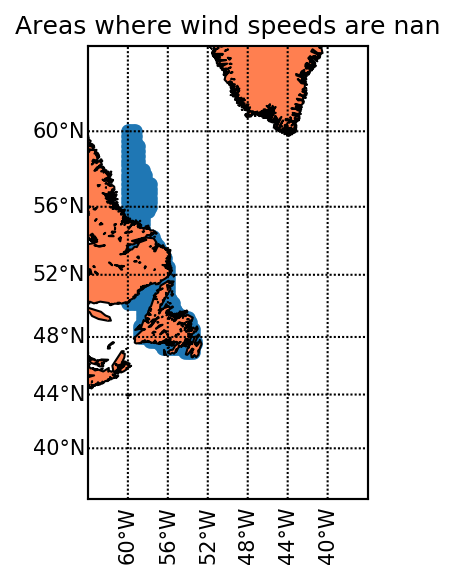

In [23]:
fig, ax = plt.subplots(dpi=150)
m = plot.get_mercator_basemap(-60, -40, 40, 60)

xs, ys = m(bad_lons, bad_lats)

ax.scatter(xs, ys)
plt.title('Areas where wind speeds are nan')
plt.show()

# New file

In [153]:
url = 'http://www.ncei.noaa.gov/thredds/dodsC/uv/6h/2000s/uv20150601rt.nc'

In [154]:
t_min = np.datetime64('2015-06-01T00:00:00')
t_max = np.datetime64('2015-06-02T00:00:00')
x_min = -60+360
x_max = -40+360
y_min = 40
y_max = 60

In [155]:
ds = xr.open_dataset(url).sel(
                                time = slice(t_min, t_max),
                                lat = slice(y_min, y_max), 
                                lon = slice(x_min, x_max))

In [156]:
ds['u']

<xarray.DataArray 'u' (time: 4, zlev: 1, lat: 81, lon: 81)>
array([[[[      nan, ...,  5.956565],
         ..., 
         [      nan, ...,       nan]]],


       ..., 
       [[[ 5.495856, ...,  5.64246 ],
         ..., 
         [      nan, ..., -2.129756]]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-06-01 2015-06-01T06:00:00 ...
  * zlev     (zlev) float32 10.0
  * lat      (lat) float32 40.0 40.25 40.5 40.75 41.0 41.25 41.5 41.75 42.0 ...
  * lon      (lon) float32 300.0 300.25 300.5 300.75 301.0 301.25 301.5 ...
Attributes:
    long_name:      Sea Surface Wind: x-component
    units:          m s-1
    standard_name:  x_wind

In [190]:
lons = ds['lon']
lats = ds['lat']

In [191]:
u = ds['u'][1,0,:,:]

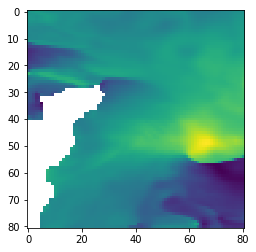

In [192]:
plt.imshow(u)
plt.show()

In [196]:
yis, xis = np.where(np.isnan(u))
bad_lats = lats[yis].values
bad_lons = lons[xis].values


/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


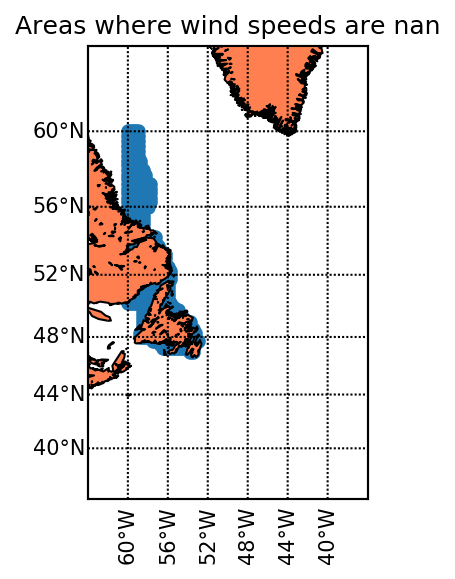

In [202]:
fig, ax = plt.subplots(dpi=150)
m = plot.get_mercator_basemap(300,320,40,60)#bad_lons[-1], bad_lons[0], bad_lats[0], bad_lats[-1])

xs, ys = m(bad_lons, bad_lats)

ax.scatter(xs, ys)
plt.title('Areas where wind speeds are nan')
plt.show()

In [199]:
bad_lons[-1]

301.0

# ECMWF wind data

In [24]:
import netCDF4 as nc

In [53]:
ds = nc.Dataset('/home/evankielley/IceDEF/notebooks/cache/WIND_GLO_WIND_L4_NRT_OBSERVATIONS_012_00420150406.nc')

In [54]:
ds['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: hours since 1900-01-01 00:00:00.0 00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (4,)
filling off

In [55]:
ds['longitude']

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (80,)
filling off

In [57]:
ds.variables

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  axis: X
              unlimited dimensions: 
              current shape = (80,)
              filling off), ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  axis: Y
              unlimited dimensions: 
              current shape = (80,)
              filling off), ('depth', <class 'netCDF4._netCDF4.Variable'>
              float32 depth(depth)
                  standard_name: depth
                  long_name: depth
                  units: m
                  positive: up
                  axis: Z
              unlimited dimensions: 
              current shape = (1,)


In [61]:
u = ds['eastward_wind'][2,0,:,:]

In [62]:
u.shape

(80, 80)

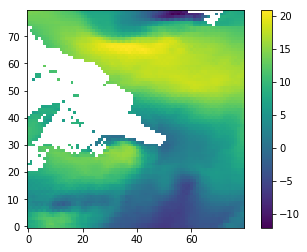

In [63]:
plt.imshow(u, origin='lower')
plt.colorbar()
plt.show()